<a href="https://colab.research.google.com/github/Hemeshdev/customer-segmentation-using-kmeans-clustering-/blob/main/Customer%20segmentation%20using%20k-means%20clustering%20machine%20learning%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data collection

In [6]:
customer_dataset = pd.read_csv('/content/Mall_Customers.csv') #getting the dataset
customer_dataset.head() #printing the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customer_dataset.shape #printing the shape of the dataset


(200, 5)

removing the unwanted columns

In [9]:
X = customer_dataset.iloc[:,[3,4]].values #getting the required columns
X.shape

(200, 2)

choosing the correct number of clusters
we use wcss to find the number of clusters we need to take
WCSS = Withing clusters sum of squares
we use elbow graph to determine the best number of clusters

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=30)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
print(wcss)

[269981.28000000014, 184609.98434090626, 106348.37306211119, 82472.19413919412, 44448.45544793369, 37455.98455516028, 32277.023173884925, 30659.650406115616, 23770.1169812072, 21775.64608111187]


creating the elbow graph

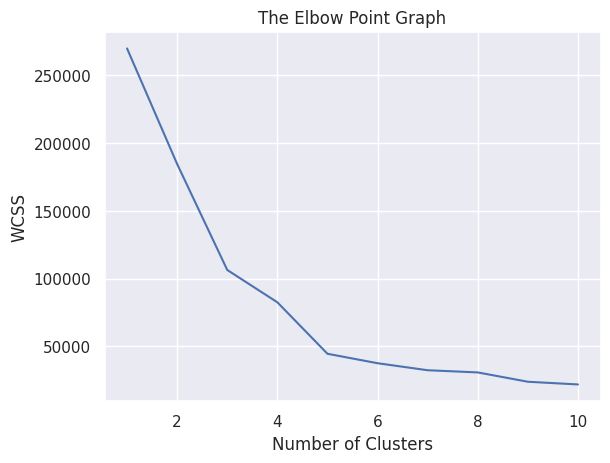

In [16]:
# we are just plotting the wcss array
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

we got 5 as the optimum number of clisters

In [17]:
#training the kmeans cluster mmodel
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=30)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


now visualize the clusters

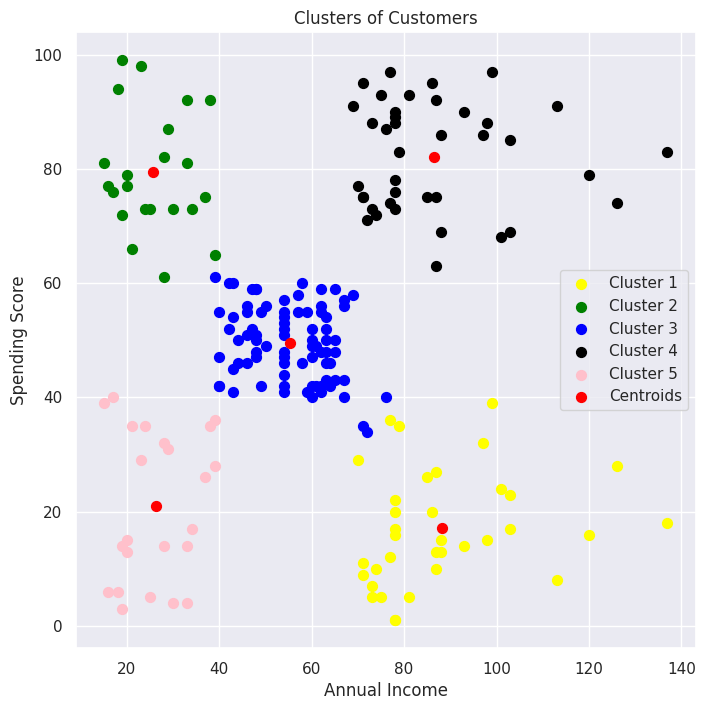

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=50,c='yellow',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=50,c='green',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=50,c='black',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=50,c='pink',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='red',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()